<h1><center>Real-Time Location System Case Study</center></h1>
<center> David Tran, Frank Sclafani, Matthew Przybyla, and Brandon Hill</center>
<center> MSDS 7333 - Quantifying the World - Case Study 6 (Unit 6)</center>
<center> June 19, 2018</center>

In [178]:
# This cell just tells the notebook to set the width of the cells in relation to the screen width
from IPython.display import display, HTML
display(HTML(data="""
<style>
    div#notebook-container    { width: 80%; }
    div#menubar-container     { width: 55%; }
    div#maintoolbar-container { width: 95%; }
</style>
"""))

import warnings
warnings.filterwarnings('ignore')

In [179]:
import pandas as pd
print('Pulling Raw Data')

rtls_link = 'http://rdatasciencecases.org/Data/offline.final.trace.txt'
series = pd.read_table(rtls_link, squeeze=True, engine='python', skiprows=2, skipfooter=1)
series.tail()

print('Raw Data Loaded')

Pulling Raw Data
Raw Data Loaded


In [273]:
labels = ['T','ID','POS','DEGREE','MAC_0','MAC_1','MAC_2','MAC_3','MAC_4',
          'MAC_5','MAC_6','MAC_7','MAC_8','MAC_9','MAC_10','MAC_11','MAC_12',
          'MAC_13','MAC_14','MAC_15','MAC_16','MAC_17','MAC_18','MAC_19','MAC_20']
df = pd.DataFrame([x.split(';') for x in series.values], columns = labels)

In [274]:
df['T'] = df['T'].str.replace("t=", "")
df['ID'] = df.ID.str.replace("id=", "")
df['POS'] = df.POS.str.replace("pos=", "")
df['DEGREE'] = df.DEGREE.str.replace("degree=", "")

In [275]:
df['DEGREE'] = pd.to_numeric(df.DEGREE, errors='coerce', downcast='float')

In [276]:
import numpy as np
df['POS'].replace('',np.nan,inplace=True)
df.dropna(subset=['POS'], inplace=True)

In [277]:
df.info()

T         146080
ID        146080
POS       146080
DEGREE    146080
MAC_0     146074
MAC_1     146041
           ...  
MAC_15        36
MAC_16        13
MAC_17         3
MAC_18         1
MAC_19         1
MAC_20         1
Length: 25, dtype: int64

In [278]:
df[['POS-X', 'POS-Y', 'POS-Z']] = df['POS'].str.split(',', expand=True)
df = df.drop('POS', axis=1)

In [279]:
df.info()

T         146080
ID        146080
DEGREE    146080
MAC_0     146074
MAC_1     146041
MAC_2     146030
           ...  
MAC_18         1
MAC_19         1
MAC_20         1
POS-X     146080
POS-Y     146080
POS-Z     146080
Length: 27, dtype: int64

In [266]:
df['ind']=df.index
df = pd.wide_to_long(df, stubnames='MAC_', i=['ind'], j='MAC')
df.rename(columns={'MAC_': 'MAC'}, inplace=True)

In [268]:
df[['MAC', 'CHANNEL', 'TYPE']] = df['MAC'].str.split(',', expand=True)
df[['MAC', 'SIGNAL']] = df['MAC'].str.split('=', expand=True)

In [270]:
df = df[['T','ID','POS-X','POS-Y','POS-Z','DEGREE','MAC','SIGNAL','CHANNEL','TYPE']]
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3067680 entries, (0, 0) to (151387, 20)
Data columns (total 10 columns):
T          object
ID         object
POS-X      object
POS-Y      object
POS-Z      object
DEGREE     object
MAC        object
SIGNAL     object
CHANNEL    object
TYPE       object
dtypes: object(10)
memory usage: 249.8+ MB


In [271]:
df.head(20)

,,T,ID,POS-X,POS-Y,POS-Z,DEGREE,MAC,SIGNAL,CHANNEL,TYPE
ind,MAC,,,,,,,,,,
0,0,1139643118358,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8a,-38,2437000000,3
1,0,1139643118744,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8a,-38,2437000000,3
2,0,1139643119002,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8a,-38,2437000000,3
3,0,1139643119263,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8a,-38,2437000000,3
4,0,1139643119538,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8a,-46,2437000000,3
5,0,1139643119818,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:14:bf:b1:97:8a,-37,2437000000,3
...,...,...,...,...,...,...,...,...,...,...,...
14,0,1139643122135,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e1:c0,-51,2462000000,3
15,0,1139643122387,00:02:2D:21:0F:33,0.0,0.0,0.0,0.0,00:0f:a3:39:e1:c0,-52,2462000000,3


# Notebook Navigation

[1) Abstract](#Abstract) 

[2) Introduction](#Introduction)

[3) Methods](#Methods) 

[4) Results](#Results) 

[5) Future Work / Discussion / Conclusions](#Future Work / Discussion / Conclusions) 

[6) References](#References) 

# Abstract

Predicting Location via Indoor Positioning Systems


    


# Introduction

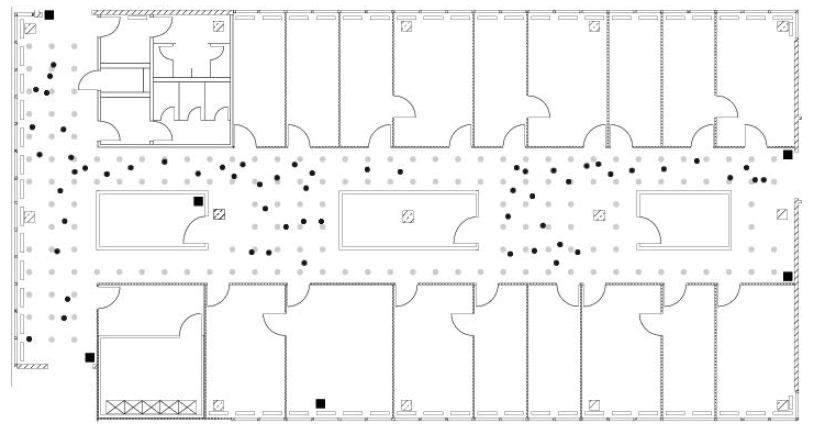

In [176]:
from IPython.display import Image
Image("C:/Users/JZW847/Desktop/floorplan.png")

## Background

The stock market volumes dataset collected via the Yahoo Finance API contains 1,304 observations and 6 variables. There is no missing data within any of the variables across all observations. Our objective is to analyze the historical daily adjusted closing stock prices for 5 major retail companies for the 5-year span between June 4, 2013 and June 1, 2018. A full list of variable descriptions, including the Datetime variable in which the observation was captured and the data is indexed by, can be found in Table 1:

|    Variable   |                                         Description                                         |    Type    |
|:-------------:|:-------------------------------------------------------------------------------------------:|:----------:|
| T             | Timestamp in milliseconds since midnight, January 1, 1970 UTC.                              |  Ordinal   |
| ID            | The MAC address of the scanning device.                                                     | Continuous |
| POS           | The physical coordinate of the scanning device. (x,y,z)                                     | Continuous |
| DEGREE        | The orientation of the user carrying the scanning device in degrees.                        | Continuous |
| MAC           | The MAC address of a responding peer (e.g., an access point or a device in adhoc mode) with the corresponding values for signal strength in dBm (Decibel-milliwatts), the channel frequency and its mode (access point = 3, device in adhoc mode = 1).| Continuous |

# Methods

# Results

# Future Work / Discussion / Conclusions

# References